What is Support Vector Machines?

SVMs are a powerful class of supervised learning algorithms for classification and regression problems. In the context of classification, SVMs can be viewed as **maximum margin linear classifiers**. 

The SVM uses an objective which explicitly encourages low out-of-sample error (good generalization performance). The $D$ dimensional data are divided into classes by maximizing the margin between the hyperplanes for the classes.

Note that we assume the two classes in the data are linearly separable. Later, for non-linear boundaries, we will use the kernel trick to exploit higher (possibly infinite) dimensional $z$-spaces, where the classes are linearly separable, find the support vectors in this space and map it back to the dimensionality of our problem.

## Linearly separable classes:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

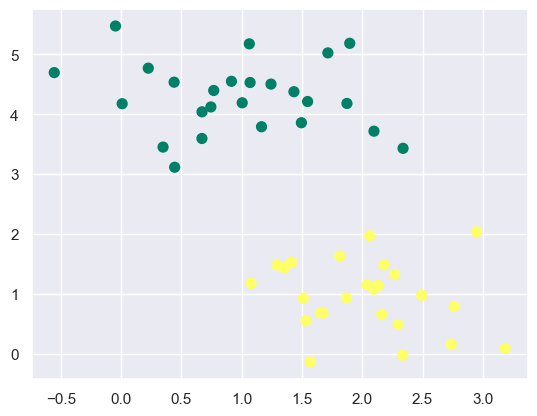

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');


The linear classifiers we know will draw a straight line between the classes. With this example, we could do this by hand. But what should strike you is that there is more than one decision boundary (lines) that can achieve minimum in-sample error.  Let's plot them below.

## Many possible separators:

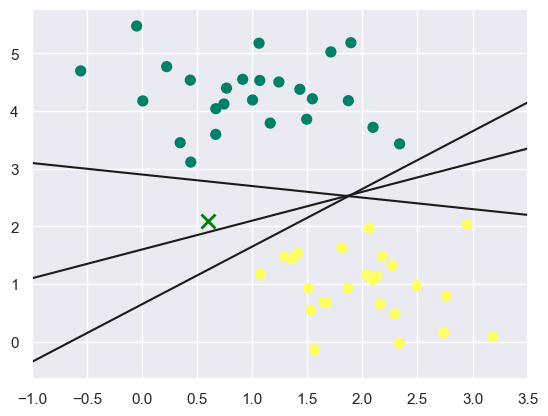

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.plot([0.6], [2.1], 'x', color='green', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

## Maximum margin linear classifiers:

For a hyperplane defined by weight $w$ and bias $b$, a linear discriminant is given by:

$$w^T x + b \left\{\begin{matrix} \geq 0\ class +1& \\ <0\ class -1 \end{matrix}\right.$$

In the above plot, we notice that for a point $x$ that is close the decision boundary at $w^T x +b =0$, a small change in $x$ can lead to a change in classification. Now assuming that the data is linearly separable, we impose that for the training data, the decision boundary should be separated from the data by some finite amount $\epsilon ^2$:

$$w^T x + b \left\{\begin{matrix} \geq \epsilon^2\ class +1& \\ <-\epsilon^2\ class -1 \end{matrix}\right.$$

For the inequality above, we conveniently set $\epsilon = 1$ so that a point $x_+$ from class +1 that is closest to the decision boundary satisfies

 $$w^T x_+ + b =1$$

and a point $x_-$ from class -1 that is closest to the decision boundary satisfies

 $$w^T x_- + b =-1$$

## Plotting the margins:

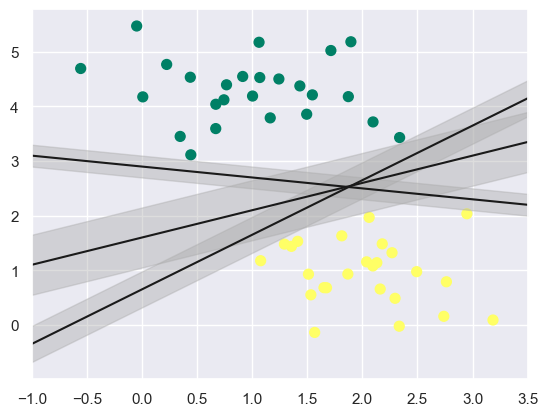

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

When using SVMs, the decision boundary that maximizes this *margin* is chosen as the optimal model. 

## (Optional) What is the (hard) margin?

From vector algebra the distance from the origin along the direction $w$ to a point $x$ is given by

$$\frac{w^T x}{\sqrt{w^T w}}$$

The $margin$ between the hyperplanes for the classes is the difference between the two distances along the direction of $w$ which is

$$\frac{w^T x}{\sqrt{w^T w}}(x_+ - x_-) = \frac{2}{\sqrt{w^T w}}$$

To maximize the the distance between two hyperplanes, we need to minimise the length $w^T w$. We know that for each $x^n$ we have a corresponding class label $y^n \in \left \{ +1, -1 \right \}$. So to classify the training labels correctly and maximize this margin, the optimzation problem is equivalent to:

$minimize\ \frac{1}{2}w^Tw$ subject to the constraints  $y^n(w^Tx^n +b)\geq 1$, and $n =1,..., N.$

Notice that this formulation is a *quadratic programming* problem -- something we know how to work with. This is known as a hard margin SVM  due to the presence of the exact classification constraint "$\geq 1$", which means that the points used as support vectors exactly fall on the boundary of the margin.

# SVM in practice:

Using the data from before, let us now train an SVM model with Scikit-Learn's suppport vector classifier. We'll defer the discussion about kernels for later in the course. For the time being, we will use a `linear` kernel and set the `C` parameter to an arbitrarily large number.

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

## Visualizing the SVM decision boundaries:

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

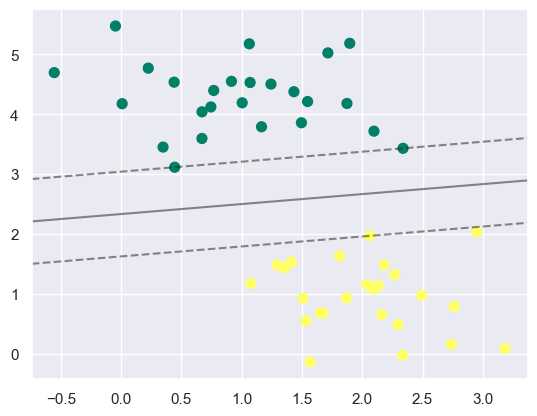

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(model);

The bold line dividing the data maximizes the margin between the two sets of points. Count the number of training points just touching the margin. These three points are known as the *support vectors*. These points exactly satisfying the margin are stored in the `support_vectors_` attribute of the classifier in Scikit-Learn.

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## Discussion:

In the hard-margin SVM classifier, only the position of the support vectors matter. Points away from the margin which are not on the correct side don't change the fit! This is because these points do not contribute to the loss function used to fit the model. 

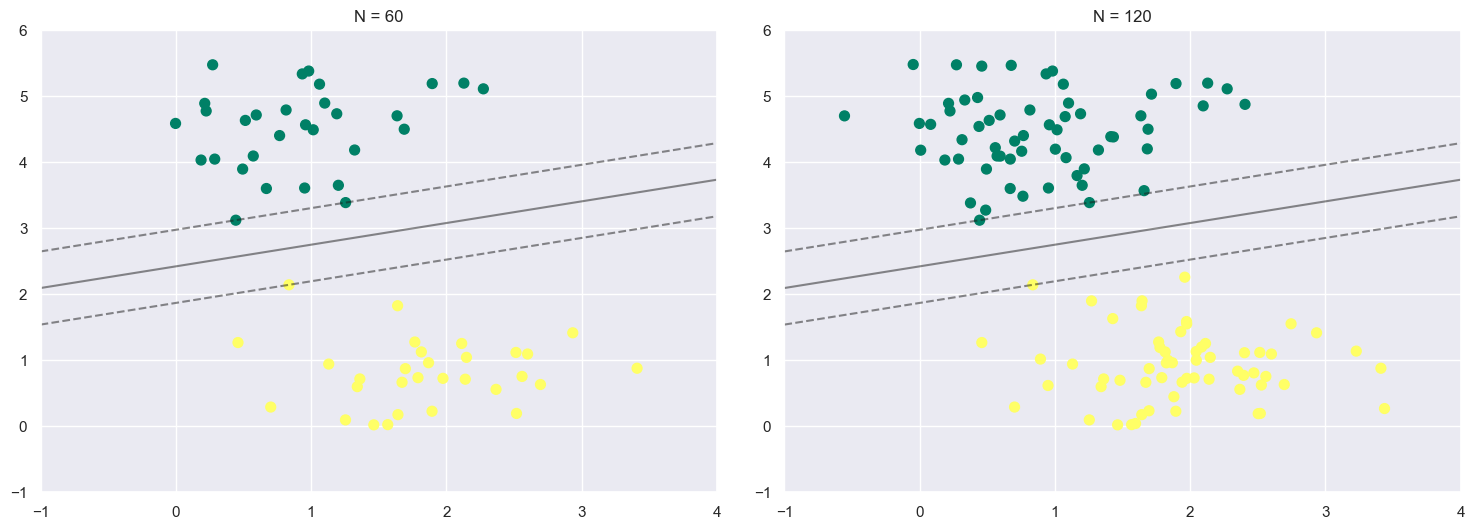

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel. This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.



## Interactive visualization:

In [13]:
pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -------- ------------------------------ 30.7/139.4 kB 217.9 kB/s eta 0:00:01
   ----------- --------------------------- 41.0/139.4 kB 217.9 kB/s eta 0:00:01
   ----------------- --------------------- 61.4/139.4 kB 273.8 kB/s eta 0:00:01
   ----------------- --------------------- 61.4/139.4 kB 273.8 kB/s eta 0:00:01
   ---------------------- ---------------- 81.9/139.4 kB 286.7 kB/s eta 0:00:01
   ------------------------- ------------- 92.2/139.4 kB 275.8 kB/s eta 0:00:01
   ------------------------------ ------- 112.6/139.4 kB 297.7 kB/s eta 0:00:01
   ------------------------------ ------- 112.6/139.4 kB 297.7 kB/s eta 0:00:01
   ------------------------------------ - 133.1/139.4 kB 253.9 kB/s eta 0:00:01
   -------------------------------------- 139.4/139.4 kB 266.9 kB

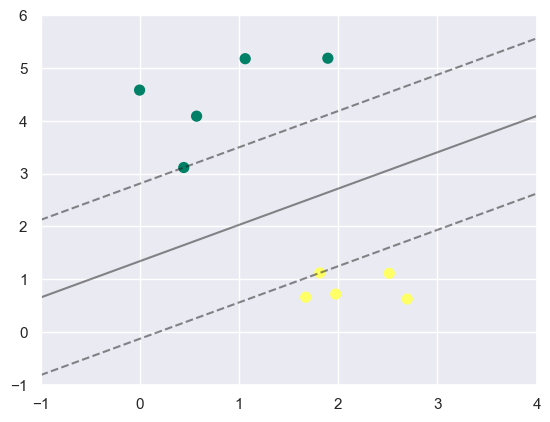

interactive(children=(IntSlider(value=10, description='N', max=200, min=10, step=10), Output()), _dom_classes=…

In [14]:
from ipywidgets import interact, fixed
interact(plot_svm, N=(10, 200, 10), ax=fixed(None));

## The Kernel trick and non-linear boundaries:

In working with linear algebra and linear regression, we have come across a version of kernels before, in the form of basis functions. We use a similar approach with kerenels, where our data is projected into a higher-dimensional space $\Re^d$ defined by a polynomial $\Phi$ of order $\mathbb{Q}$ and a basis function, and thereby fit for nonlinear relationships with a linear classifier.

Let's now plot some data that is not linearly separable:

In [16]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC

X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)


On running the cell a couple of times, I think you can tell that there is no linear decision boundary that will ever be able to separate the data. Here is where kernels come in handy. We can project our data into a high dimensional space where there exists a linear separater. One widely used projection is computed using a *radial basis function* centered on the middle clump.

In [23]:
r = np.exp(-(X ** 2).sum(1))

## Visualizing higher-dimensional projections:

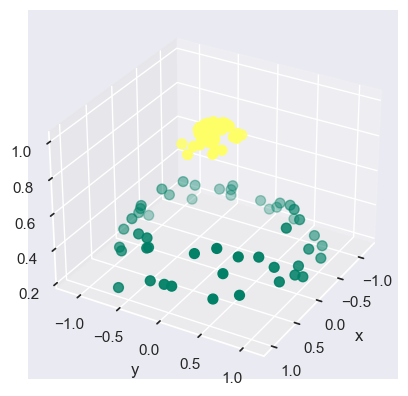

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

In [24]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='summer')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azip=(-180, 180),
         X=fixed(X), y=fixed(y));

In [25]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

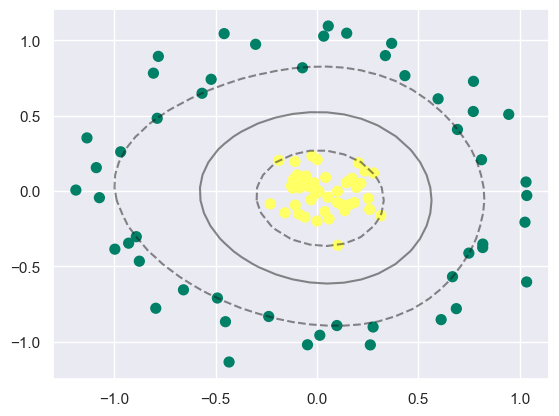

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');